In [2]:
import pandas as pd
import kaggle


code4ML_path = "/home/ryounis/Documents/Zurich/PEACHLab/data/Code4ML"

kernels_meta = pd.read_csv(f"{code4ML_path}/kernels_meta.csv")
markup_data = pd.read_csv(f"{code4ML_path}/markup_data.csv")
vertices = pd.read_csv(f"{code4ML_path}/vertices.csv")
code_blocks = pd.read_csv(f"{code4ML_path}/code_blocks.csv")
data_preds = pd.read_csv(f"{code4ML_path}/data_with_preds.csv")

code_blocks

,code_blocks_index,kernel_id,code_block_id,code_block
0,0,17493583,0,# This Python 3 environment comes with many he...
1,1,17493583,1,import os\nimport zipfile\nfrom subprocess imp...
2,2,17493583,2,"def reduce_mem_usage(df):\n """""" iterate thr..."
3,3,17493583,3,import numpy as np
4,4,17493583,4,orders_df = reduce_mem_usage(pd.read_csv('../w...
...,...,...,...,...
2599348,2599348,8902213,22,"f=[]\n\nfor root, dirs, files in os.walk(""../o..."
2599349,2599349,8902213,23,my_model.fit_generator(\n train_data_ge...
2599350,2599350,8902213,24,test_generator.reset()\n\npred = my_model.pred...
2599351,2599351,8902213,25,import cv2\n\n\nfrom matplotlib import pyplot ...


In [3]:
kernels_count = kernels_meta.groupby('comp_name').size()
n_kernels_per_comp = kernels_meta['comp_name'].value_counts()
N_HIGHEST_COMP = 4
top_comp = kernels_count.nlargest(N_HIGHEST_COMP).index[N_HIGHEST_COMP-1]
print(f"Competition with most kernels: '{top_comp}'  ({kernels_count.nlargest(N_HIGHEST_COMP).iloc[N_HIGHEST_COMP-1]} kernels)\n")
for name in n_kernels_per_comp.index:
    print(f"{name}: {n_kernels_per_comp[name]} kernels")

Competition with most kernels: 'Natural Language Processing with Disaster Tweets'  (725 kernels)

Titanic - Machine Learning from Disaster: 1963 kernels
Digit Recognizer: 1300 kernels
House Prices - Advanced Regression Techniques: 1013 kernels
Natural Language Processing with Disaster Tweets: 725 kernels
Quora Insincere Questions Classification: 679 kernels
Mechanisms of Action (MoA) Prediction: 660 kernels
COVID19 Global Forecasting (Week 4): 434 kernels
Santander Customer Transaction Prediction: 418 kernels
PUBG Finish Placement Prediction (Kernels Only): 394 kernels
Tweet Sentiment Extraction: 386 kernels
Cassava Leaf Disease Classification: 383 kernels
Kannada MNIST: 362 kernels
Aerial Cactus Identification: 345 kernels
SIIM-ISIC Melanoma Classification: 325 kernels
Riiid Answer Correctness Prediction: 322 kernels
IEEE-CIS Fraud Detection: 303 kernels
APTOS 2019 Blindness Detection: 303 kernels
Predict Future Sales: 295 kernels
COVID19 Global Forecasting (Week 2): 288 kernels
Globa

In [4]:
kernels = kernels_meta[kernels_meta['comp_name'] == top_comp]
top_comp_code_blocks = code_blocks[code_blocks['kernel_id'].isin(kernels['kernel_id'])]
merged_df = pd.merge(top_comp_code_blocks, kernels_meta, on='kernel_id')
top_comp_code_blocks = merged_df.drop(columns=['kaggle_score', 'kaggle_comments', 'kaggle_upvotes', 'comp_name'])
top_comp_code_blocks


,code_blocks_index,kernel_id,code_block_id,code_block,kernel_link
0,9741,14113092,0,# This Python 3 environment comes with many he...,/nicknosorogov/distweetrhinosceros
1,9742,14113092,1,"train = pd.read_csv(""../input/nlp-getting-star...",/nicknosorogov/distweetrhinosceros
2,9743,14113092,2,def lowercase_text(text):\n return text.low...,/nicknosorogov/distweetrhinosceros
3,9744,14113092,3,import re\nimport string\ndef remove_noise(tex...,/nicknosorogov/distweetrhinosceros
4,9745,14113092,4,# Tokenizing the training and the test set\nim...,/nicknosorogov/distweetrhinosceros
...,...,...,...,...,...
22621,2462840,10038839,108,#train BERT\nhistory_bert = BERT_large.fit([tr...,/tuckerarrants/disaster-tweets-eda-glove-rnns-...
22622,2462841,10038839,109,#load model with best losses\nBERT_large.load_...,/tuckerarrants/disaster-tweets-eda-glove-rnns-...
22623,2462842,10038839,110,#save as dataframe\nsubmission_bert = pd.DataF...,/tuckerarrants/disaster-tweets-eda-glove-rnns-...
22624,2462843,10038839,111,"#and last but not least, submit\nsubmission_be...",/tuckerarrants/disaster-tweets-eda-glove-rnns-...


In [28]:
merged_df = pd.merge(top_comp_code_blocks.merge(data_preds, on='code_blocks_index'), vertices, left_on='predicted_graph_vertex_id', right_on='graph_vertex_id')
merged_df.drop(['code_blocks_index', 'predicted_graph_vertex_id'], axis=1, inplace=True)
merged_df

,kernel_id,code_block_id,code_block,kernel_link,predicted_graph_vertex__probability,graph_vertex_id,graph_vertex_class,graph_vertex_subclass
0,14113092,0,# This Python 3 environment comes with many he...,/nicknosorogov/distweetrhinosceros,0.999220,88,Debug,list_files
1,14113092,1,"train = pd.read_csv(""../input/nlp-getting-star...",/nicknosorogov/distweetrhinosceros,0.999676,45,Data_Extraction,load_from_csv
2,14113092,2,def lowercase_text(text):\n return text.low...,/nicknosorogov/distweetrhinosceros,0.922104,20,Data_Transform,categorify
3,14113092,3,import re\nimport string\ndef remove_noise(tex...,/nicknosorogov/distweetrhinosceros,0.751464,20,Data_Transform,categorify
4,14113092,4,# Tokenizing the training and the test set\nim...,/nicknosorogov/distweetrhinosceros,0.923835,8,Data_Transform,feature_engineering
...,...,...,...,...,...,...,...,...
22621,10038839,108,#train BERT\nhistory_bert = BERT_large.fit([tr...,/tuckerarrants/disaster-tweets-eda-glove-rnns-...,0.999671,7,Model_Train,train_model
22622,10038839,109,#load model with best losses\nBERT_large.load_...,/tuckerarrants/disaster-tweets-eda-glove-rnns-...,0.984101,48,Model_Evaluation,predict_on_test
22623,10038839,110,#save as dataframe\nsubmission_bert = pd.DataF...,/tuckerarrants/disaster-tweets-eda-glove-rnns-...,0.845476,55,Data_Export,prepare_output
22624,10038839,111,"#and last but not least, submit\nsubmission_be...",/tuckerarrants/disaster-tweets-eda-glove-rnns-...,0.998979,25,Data_Export,save_to_csv


In [29]:
merged_df.loc[merged_df['graph_vertex_class'] == 'EDA', 'graph_vertex_class'] = 'Exploratory_Data_Analysis'
merged_df.loc[merged_df['graph_vertex_class'] == 'Hyperparam_Tuning', 'graph_vertex_class'] = 'Model_Train'
merged_df.loc[merged_df['graph_vertex_class'] == 'Model_Interpretation', 'graph_vertex_class'] = 'Visualization'
merged_df.loc[merged_df['graph_vertex_class'] == 'Debug', 'graph_vertex_class'] = 'Exploratory_Data_Analysis'
merged_df.loc[merged_df['graph_vertex_class'] == 'Other', 'graph_vertex_class'] = 'Exploratory_Data_Analysis'
merged_df.loc[merged_df['graph_vertex_class'] == 'Environment', 'graph_vertex_class'] = 'Imports_and_Environment'

LABELS = [
    "Data_Transform",
    "Data_Extraction",
    "Visualization",
    "Model_Train",
    "Model_Evaluation",
    "Imports_and_Environment",
    "Data_Export",
    "Exploratory_Data_Analysis", 
    # "Other" # "Other"
]
merged_df

,kernel_id,code_block_id,code_block,kernel_link,predicted_graph_vertex__probability,graph_vertex_id,graph_vertex_class,graph_vertex_subclass
0,14113092,0,# This Python 3 environment comes with many he...,/nicknosorogov/distweetrhinosceros,0.999220,88,Exploratory_Data_Analysis,list_files
1,14113092,1,"train = pd.read_csv(""../input/nlp-getting-star...",/nicknosorogov/distweetrhinosceros,0.999676,45,Data_Extraction,load_from_csv
2,14113092,2,def lowercase_text(text):\n return text.low...,/nicknosorogov/distweetrhinosceros,0.922104,20,Data_Transform,categorify
3,14113092,3,import re\nimport string\ndef remove_noise(tex...,/nicknosorogov/distweetrhinosceros,0.751464,20,Data_Transform,categorify
4,14113092,4,# Tokenizing the training and the test set\nim...,/nicknosorogov/distweetrhinosceros,0.923835,8,Data_Transform,feature_engineering
...,...,...,...,...,...,...,...,...
22621,10038839,108,#train BERT\nhistory_bert = BERT_large.fit([tr...,/tuckerarrants/disaster-tweets-eda-glove-rnns-...,0.999671,7,Model_Train,train_model
22622,10038839,109,#load model with best losses\nBERT_large.load_...,/tuckerarrants/disaster-tweets-eda-glove-rnns-...,0.984101,48,Model_Evaluation,predict_on_test
22623,10038839,110,#save as dataframe\nsubmission_bert = pd.DataF...,/tuckerarrants/disaster-tweets-eda-glove-rnns-...,0.845476,55,Data_Export,prepare_output
22624,10038839,111,"#and last but not least, submit\nsubmission_be...",/tuckerarrants/disaster-tweets-eda-glove-rnns-...,0.998979,25,Data_Export,save_to_csv


In [30]:
distinct_kernel_links = kernels['kernel_link'].unique()
len(distinct_kernel_links)

725

In [31]:
filtered_df = merged_df[merged_df['kernel_link'] == distinct_kernel_links[3]].sort_values('code_block_id', ascending=True)
filtered_df

,kernel_id,code_block_id,code_block,kernel_link,predicted_graph_vertex__probability,graph_vertex_id,graph_vertex_class,graph_vertex_subclass
43,22956883,0,import numpy as np\nimport pandas as pd\nfrom ...,/renraeldab/disaster-tweets,0.999302,22,Imports_and_Environment,import_modules
44,22956883,1,train = pd.read_csv('/kaggle/input/nlp-getting...,/renraeldab/disaster-tweets,0.999751,45,Data_Extraction,load_from_csv
45,22956883,2,def filter_text(df):\n df['text']=df['text'...,/renraeldab/disaster-tweets,0.995599,8,Data_Transform,feature_engineering
46,22956883,3,"sw=['the', 'a', 'an', 'in', 'on', 'with', 'by'...",/renraeldab/disaster-tweets,0.997215,77,Exploratory_Data_Analysis,define_variables
47,22956883,4,v = CountVectorizer(stop_words=sw)\ntrain_v = ...,/renraeldab/disaster-tweets,0.997267,8,Data_Transform,feature_engineering
48,22956883,5,y = train['target'],/renraeldab/disaster-tweets,0.999064,21,Data_Transform,prepare_x_and_y
49,22956883,6,clf = MultinomialNB()\nscorer = make_scorer(f1...,/renraeldab/disaster-tweets,0.983758,6,Model_Train,train_on_grid
50,22956883,7,y = model.predict(test_v)\noutput = pd.DataFra...,/renraeldab/disaster-tweets,0.999141,25,Data_Export,save_to_csv


In [22]:
test_dataset_dir = "../../data/test_datasets"
merged_df.to_csv(f'{test_dataset_dir}/{top_comp}.csv', index=False)

OSError: Cannot save file into a non-existent directory: '../../data/test_datasets'

#### Actual cell for saving the classified notebooks in a folder 

In [32]:
import sys
sys.path.insert(0, '../')
from utils.constants import BLANK_IPYNB_JSON
from utils.helper_functions import load_notebook
import json
import os
import tempfile 
from kaggle.api.kaggle_api_extended import ApiException
from tqdm import tqdm

test_ipynb_dir = f"./tmp/{top_comp}"
if not os.path.exists(test_ipynb_dir): os.makedirs(test_ipynb_dir)

FIRST_N_KERNELS = 30

notebooks = []
for kernel_link in tqdm(distinct_kernel_links[:FIRST_N_KERNELS]):
    with tempfile.TemporaryDirectory() as temp_dir:
        kernel_df = merged_df[merged_df['kernel_link'] == kernel_link].sort_values('code_block_id', ascending=True)
        try:
            kaggle.api.kernels_pull(kernel_link[1:], path=temp_dir, metadata=True)
            notebook_path = f"{temp_dir}/{kernel_link.split('/')[-1]}.ipynb"
            notebook = load_notebook(notebook_path)
        except ApiException as e:
            print(f"Error pulling kernel: {kernel_link}")
            continue
        
    code_cell_counter = 0
    for cell in notebook['cells']:
        if cell['cell_type'] == 'code' and len(cell['source']):
            row = kernel_df.iloc[code_cell_counter]
            code_cell_counter += 1

            cell["metadata"] = {
                **cell["metadata"],
                "class": row["graph_vertex_class"],
                "subclass": row["graph_vertex_subclass"],
                "subclass_id": int(row["graph_vertex_id"]),
                "predicted_subclass_probability": row["predicted_graph_vertex__probability"],
                "notebook_id": int(row['kernel_id']),
            }    
    notebooks.append(notebook)
    # with open(f"{test_ipynb_dir}/{kernel_link.split('/')[-1]}.ipynb", "w") as f:json.dump(notebook, f)
    
print(f"Saved {len(notebooks)} notebooks to {test_ipynb_dir}")

 27%|██▋       | 8/30 [00:04<00:11,  1.94it/s]

Error pulling kernel: /andrej0marinchenko/nlp-with-disaster-tweets-new-b


 50%|█████     | 15/30 [00:09<00:07,  2.01it/s]

Error pulling kernel: /sohelranaccselab/nlp-disaster-tweets-using-bert-for-beginner


100%|██████████| 30/30 [00:18<00:00,  1.64it/s]

Saved 28 notebooks to ./tmp/Natural Language Processing with Disaster Tweets


In [33]:
import sys
sys.path.insert(0, '../')
from utils.constants import FIRST_LAYER_LABELS, classifier_prompt
from Classifiers.GPTClassifier import GPTClassifier
with open('../../../secrets/api_key.txt', 'r') as f: api_key = f'{f.read()}'

# LABELS = FIRST_LAYER_LABELS
# LABELS = SECOND_LAYER_LABELS


prompt = classifier_prompt(LABELS)
classifier = GPTClassifier(api_key=api_key, prompt=prompt, labels=LABELS)

In [34]:
all_truths = []
all_preds = []
all_codes = []
total_accuracy = 0
for notebook in notebooks:
    accuracy, _, truths, preds = classifier.evaluate(notebook, False)
    total_accuracy += accuracy
    all_truths += truths
    all_preds += preds
    all_codes += [cell['source'] for cell in notebook['cells'] if cell['cell_type'] == 'code' and len(cell['source'])]

total_accuracy /= len(notebooks)
print(f"Accuracy: {total_accuracy:.2f}%")

Evaluating: 100%|██████████| 10/10 [00:13<00:00,  1.32s/it]

Accuracy: 72.13%


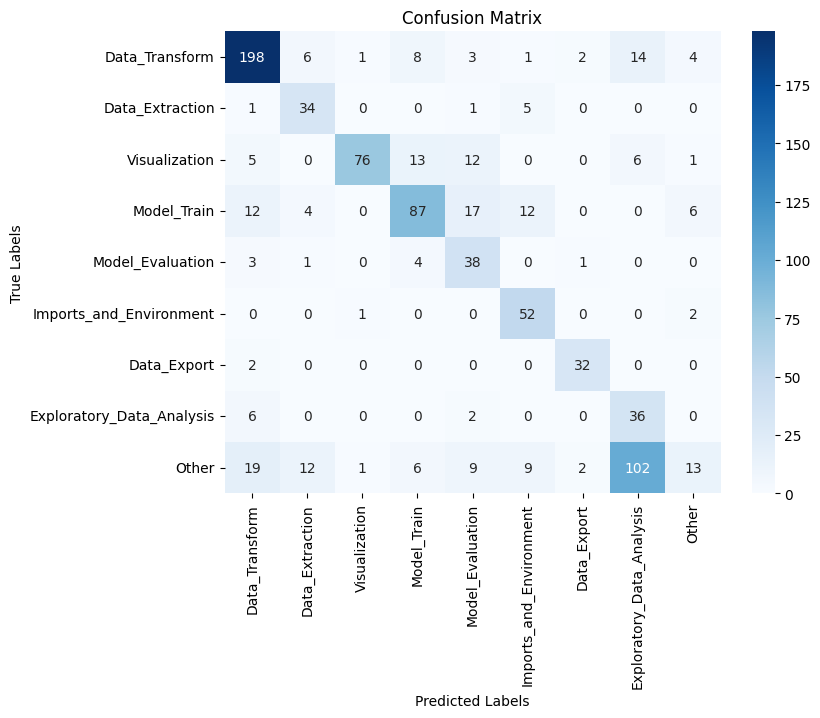

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Example true and predicted labels
true_labels = all_truths
predicted_labels = all_preds

# Define your class labels
labels = LABELS

# Compute the confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels, labels=labels)

# Create a heatmap for visualization
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [1]:
import pandas as pd

df = pd.DataFrame({ 'Code': all_codes, 'True Label': all_truths, 'Predicted Label': all_preds})
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

df[(df['Predicted Label'] == "Data_Extraction") & (df['True Label'] == "Other")]

NameError: name 'all_codes' is not defined

In [ ]:
from utils.helper_functions import notebook_extract_code, notebook_add_class_labels

notebooks = []
for kernel_id in merged_df['kernel_id'].unique()[:20]:
    notebook_json = BLANK_IPYNB_JSON.copy()
    notebook_json['cells'] = []
    for row in merged_df[merged_df['kernel_id'] == kernel_id].iterrows():
        notebook_json['cells'].append({
            "cell_type": "code",
            "execution_count": None,
            "metadata": {
                "graph_vertex_id": row[1]["graph_vertex_id"],
                "predicted_graph_vertex__probability": row[1]["predicted_graph_vertex__probability"],
                "notebook_id": row[1]['kernel_id'],
            },
            "source": row[1]['code_block']
        })
    notebooks.append(notebook_json)
# notebook_code = notebook_extract_code(notebook_json)
# cell_labels = classifier.classify_notebook(notebook_code)
# notebook_json = notebook_add_class_labels(notebook_json, cell_labels)


In [ ]:
labeled_notebooks = []
notebook_cell_labels = []
for i, notebook_json in enumerate(notebooks):
    print(f"Notebook {i+1}/{len(notebooks)}", end='\r')
    
    notebook_code = notebook_extract_code(notebook_json)
    cell_labels = classifier.classify_notebook(notebook_code)
    notebook_json = notebook_add_class_labels(notebook_json, cell_labels)
    labeled_notebooks.append(notebook_json)
    notebook_cell_labels.append(cell_labels)

In [ ]:
embeddings = []
for notebook in notebook_cell_labels:
    for elem in notebook:
        embeddings.append(elem[1])
embeddings

In [ ]:
from sklearn.cluster import HDBSCAN

clusterer: HDBSCAN = HDBSCAN(
    min_cluster_size=4,                 # Minimum number of samples to form a cluster
    min_samples=2,                      # Minimum number of samples in a neighborhood to be considered as a core point
    cluster_selection_epsilon=0,     # If 2 clusters are less than epsilon apart, they get merged
)

clusterer.fit(embeddings)
for label in set(clusterer.labels_):
    print(f"Cluster {label}: {len([x for x in clusterer.labels_ if x == label])} cells")
clusterer.labels_

In [ ]:
counter = 0
for notebook in labeled_notebooks:
    for cell in notebook['cells']:
        cell['metadata']['cluster_label'] = clusterer.labels_[counter]
        counter += 1

In [ ]:
labeled_notebooks[0]["cells"]
true_labels = []
predicted_labels = []
for notebook in labeled_notebooks:
    for cell in notebook["cells"]:
        true_labels.append(cell["metadata"]["graph_vertex_id"])
        predicted_labels.append(cell["metadata"]["cluster_label"])

In [ ]:
from scipy.optimize import linear_sum_assignment
import numpy as np

def count_misclustered_elements(true_labels, predicted_labels):
    # Convert the labels to numpy arrays for easier manipulation
    true_labels = np.array(true_labels)
    predicted_labels = np.array(predicted_labels)
    
    unique_true_labels = np.unique(true_labels)
    unique_predicted_labels = np.unique(predicted_labels)
    
    cost_matrix = np.zeros((len(unique_true_labels), len(unique_predicted_labels)), dtype=int)
    
    for i, true_label in enumerate(unique_true_labels):
        for j, predicted_label in enumerate(unique_predicted_labels):
            cost_matrix[i, j] = np.sum((true_labels == true_label) & (predicted_labels != predicted_label))
    
    row_ind, col_ind = linear_sum_assignment(cost_matrix)
    
    misclustered_count = cost_matrix[row_ind, col_ind].sum()
    
    return misclustered_count

misclustered_count = count_misclustered_elements(true_labels, predicted_labels)
print(f"Number of misclustered elements: {misclustered_count}/{len(true_labels)}")
print(f"Score: {1 - misclustered_count/len(true_labels)} %")


In [ ]:
for notebook in labeled_notebooks:
    for cell in notebook['cells']:
        cell['metadata']['cluster_label'] = clusterer.labels_[counter]
        counter += 1